# Seaborn 
its just a visually more appealing and easy form of matplotlib(its based off of it too)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import ast

df = pd.read_csv("C:/Users/DELL/Downloads/data_jobs.csv")
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# This is a normal bar chart

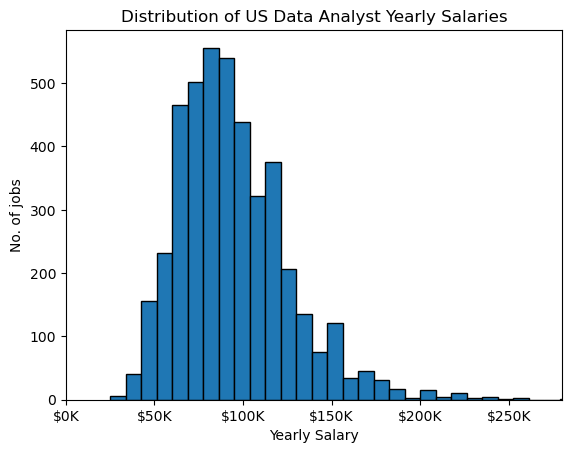

In [ ]:
df_us_da = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()
df_us_da['salary_year_avg'].plot(kind='hist', bins=40, edgecolor='k')
plt.xlim(0, 280000)
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _:f'${int(x/1000)}K'))
plt.xlabel("Yearly Salary")
plt.ylabel('No. of jobs')
plt.title('Distribution of US Data Analyst Yearly Salaries')
plt.show()

lets enhance it

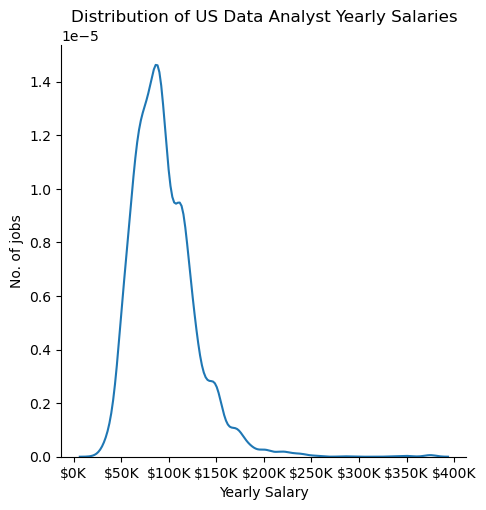

In [13]:
# df_us_da['salary_year_avg'].plot(kind='hist', bins=40, edgecolor='k')

sns.displot(data=df_us_da['salary_year_avg'], kind='kde')
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _:f'${int(x/1000)}K'))
plt.xlabel("Yearly Salary")
plt.ylabel('No. of jobs')
plt.title('Distribution of US Data Analyst Yearly Salaries')
plt.show()

# Same with these bar charts

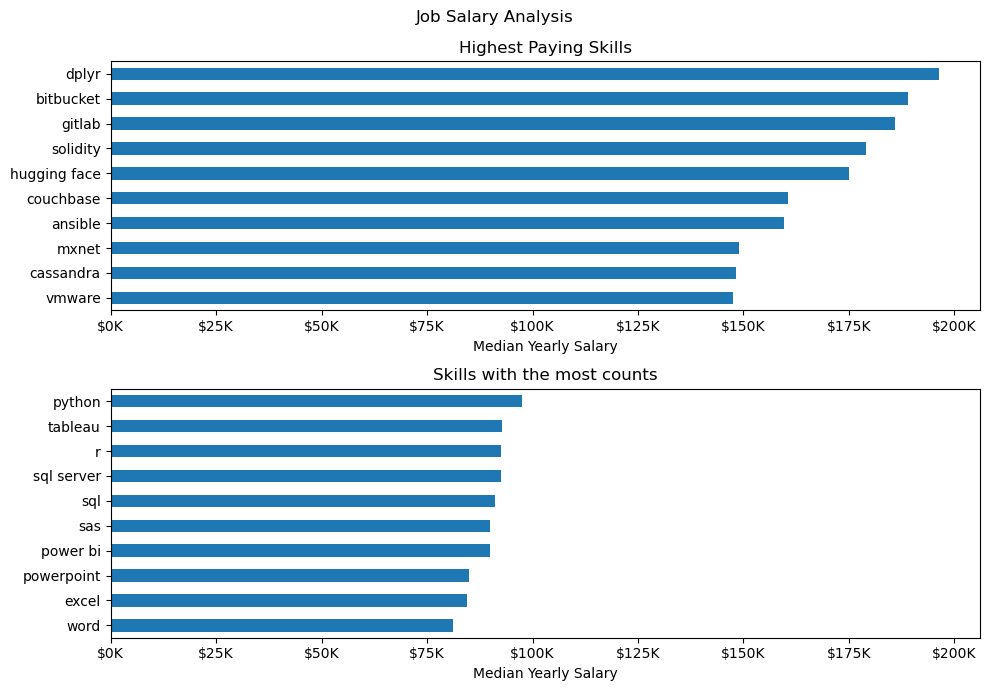

In [18]:
df_ind = df[(df['job_country']=='United States') & (df['job_title_short']=='Data Analyst')]
df_ind = df_ind.dropna(subset=['salary_year_avg'])
df_ind = df_ind.explode('job_skills')
df_da_ind_grp = df_ind.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])
df_top_pay = df_da_ind_grp.sort_values('median', ascending=False).head(10)
df_top_count = df_da_ind_grp.sort_values('count', ascending=False).head(10).sort_values('median', ascending=False).head(10)

fig, axs = plt.subplots(2, 1, figsize=(10, 7))

df_top_pay.plot(kind='barh', y='median', ax=axs[0], legend=False)
axs[0].set_title('Highest Paying Skills')
axs[0].invert_yaxis()
axs[0].set_xlabel('Median Yearly Salary')
axs[0].set_ylabel('')
axs[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _:f'${int(x/1000)}K'))



df_top_count.plot(kind='barh', y='median', ax=axs[1], legend=False)
axs[1].set_title('Skills with the most counts')
axs[1].invert_yaxis()
axs[1].set_xlabel('Median Yearly Salary')
axs[1].set_ylabel('')
axs[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _:f'${int(x/1000)}K'))
axs[1].set_xlim(axs[0].get_xlim())

plt.suptitle('Job Salary Analysis')
plt.tight_layout()

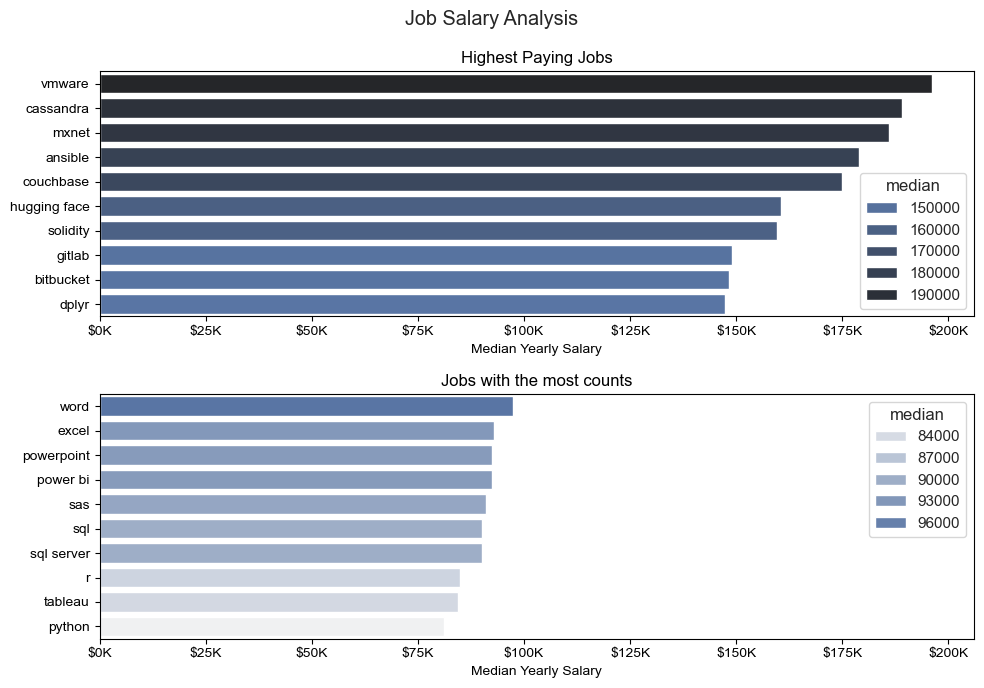

In [31]:
fig, axs = plt.subplots(2, 1, figsize=(10, 7))
sns.set_theme(style="ticks")

# df_top_pay.plot(kind='barh', y='median', ax=axs[0], legend=False)

sns.barplot(data=df_top_pay[::-1], x='median', y=df_top_pay.index, ax=axs[0], hue='median', palette='dark:b_r')
axs[0].set_title('Highest Paying Jobs')
axs[0].invert_yaxis()
axs[0].set_xlabel('Median Yearly Salary')
axs[0].set_ylabel('')
axs[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _:f'${int(x/1000)}K'))



# df_top_count.plot(kind='barh', y='median', ax=axs[1], legend=False)

sns.barplot(data=df_top_count[::-1], x='median', y=df_top_count.index, ax=axs[1],hue='median', palette='light:b')
axs[1].set_title('Jobs with the most counts')
axs[1].invert_yaxis()
axs[1].set_xlabel('Median Yearly Salary')
axs[1].set_ylabel('')
axs[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _:f'${int(x/1000)}K'))
axs[1].set_xlim(axs[0].get_xlim())

plt.suptitle('Job Salary Analysis')
plt.tight_layout()

# Now the box plot

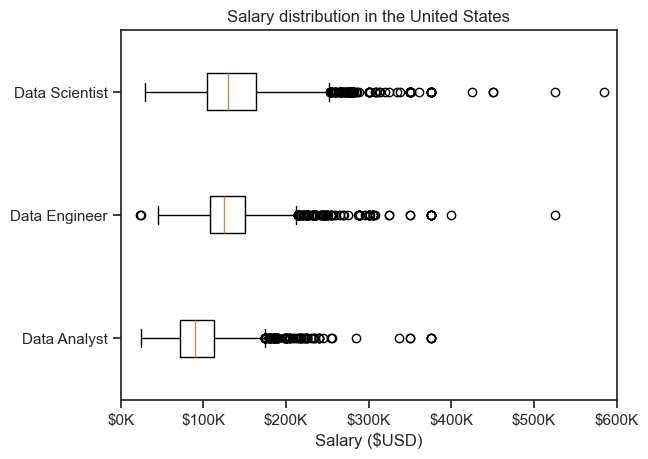

In [32]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country']=='United States')].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])
job_list2 = [df_US[df_US['job_title_short']==jobtitle]['salary_year_avg'] for jobtitle in job_titles]
plt.boxplot(job_list2, tick_labels=job_titles, vert=False)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _:f'${int(x/1000)}K'))
plt.xlabel('Salary ($USD)')
plt.title('Salary distribution in the United States')
plt.xlim(0, 600000)
plt.show()

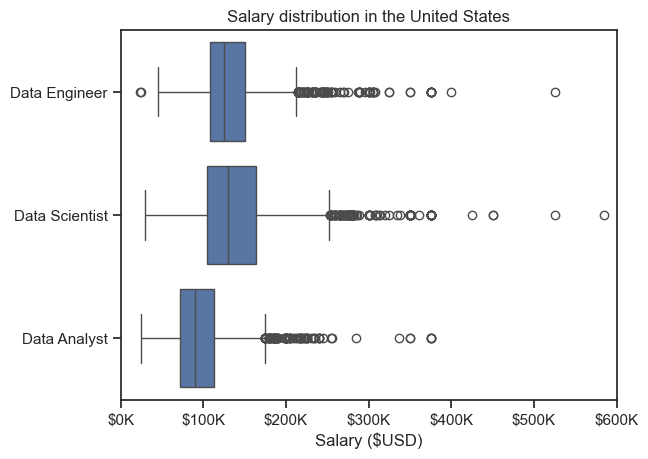

In [34]:
# plt.boxplot(job_list2, tick_labels=job_titles, vert=False)

sns.boxplot(data=df_US, x='salary_year_avg', y='job_title_short')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _:f'${int(x/1000)}K'))
plt.xlabel('Salary ($USD)')
plt.ylabel('')
plt.title('Salary distribution in the United States')
plt.xlim(0, 600000)
plt.show()